,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,318,45,49,49,65,65,45,1,0
1,2,405,60,62,63,80,80,60,1,0
2,3,525,80,82,83,100,100,80,1,0
3,3,625,80,100,123,122,120,80,1,0
4,4,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,1
796,719,700,50,160,110,160,110,110,6,1
797,720,600,80,110,60,150,130,70,6,1
798,720,680,80,160,60,170,130,80,6,1


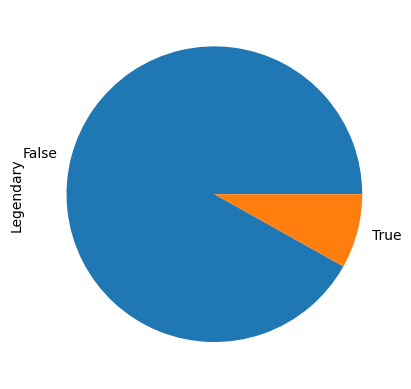

In [50]:
import pandas as pd
import numpy as np
df = pd.read_csv('Pokemon.csv')
beta = df['Legendary']
df["Legendary"] = df["Legendary"].astype(int)
# Visualise the data
beta.value_counts().plot.pie()
# print(df['Legendary'].dtype)
df = df.drop(['Name','Type 1','Type 2'], axis=1)
df

## SMOTE.

<Axes: ylabel='Legendary'>

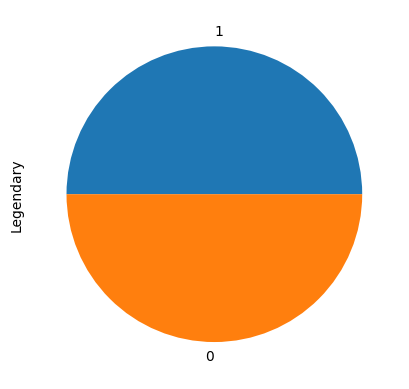

In [66]:
from crucio import SMOTE
smote = SMOTE()
balanced_df1 = smote.balance(df, 'Legendary')
balanced_df1 
balanced_df1['Legendary'].value_counts().plot.pie()


## SMOTEENN.

<Axes: ylabel='Legendary'>

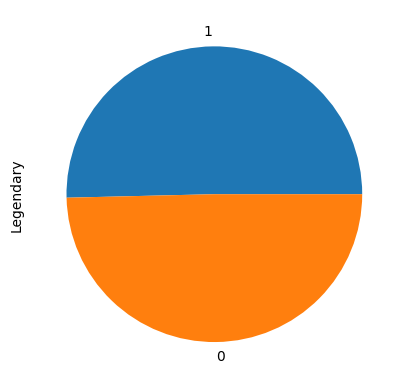

In [67]:
from crucio import SMOTEENN
smoteenn = SMOTEENN()
balanced_df2 = smoteenn.balance(df, 'Legendary')
balanced_df2
balanced_df2['Legendary'].value_counts().plot.pie()


## ICOTE

<Axes: ylabel='Legendary'>

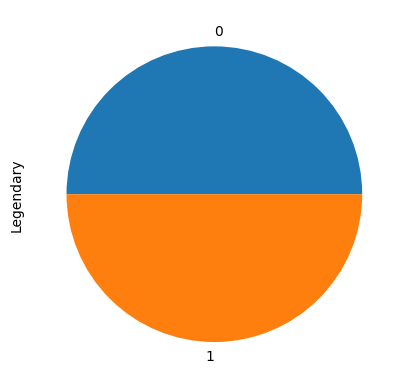

In [68]:
from crucio import ICOTE
icote = ICOTE()
balanced_df3 = icote.balance(df, 'Legendary')
balanced_df3
balanced_df3['Legendary'].value_counts().plot.pie()


## TKRKNN

<Axes: ylabel='Legendary'>

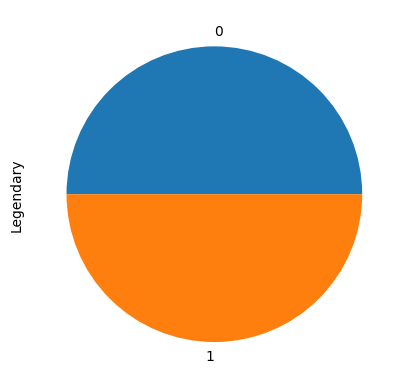

In [69]:
from crucio import TKRKNN
tkrknn = TKRKNN()
balanced_df4 = tkrknn.balance(df=df,target='Legendary')
balanced_df4
balanced_df4['Legendary'].value_counts().plot.pie()


## Use Logistic Regression without oversampling

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
x = df.drop(['Legendary'],axis=1)
y = df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)
delta = LogisticRegression().fit(X_train,y_train)
output = delta.predict(X_test)
df5 = pd.DataFrame(output)
print(r2_score(y_test,output))


0.09502262443438925


## Use Logistic Regression using oversampling (SMOTE)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
x = balanced_df1.drop(['Legendary'],axis=1)
y = balanced_df1['Legendary']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)
delta = LogisticRegression().fit(X_train,y_train)
output = delta.predict(X_test)
df5 = pd.DataFrame(output)
print(r2_score(y_test,output))


0.6521739130434783


## Use Logistic Regression using oversampling (SMOTEENN)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
x = balanced_df2.drop(['Legendary'],axis=1)
y = balanced_df2['Legendary']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)
delta = LogisticRegression().fit(X_train,y_train)
output = delta.predict(X_test)
df5 = pd.DataFrame(output)
print(r2_score(y_test,output))


0.736064533671712


## Use Logistic Regression using oversampling (ICOTE)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
x = balanced_df3.drop(['Legendary'],axis=1)
y = balanced_df3['Legendary']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)
delta = LogisticRegression().fit(X_train,y_train)
output = delta.predict(X_test)
df5 = pd.DataFrame(output)
print(r2_score(y_test,output))


0.9124617168683655


## Use Logistic Regression using oversampling (TKRKNN)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
x = balanced_df4.drop(['Legendary'],axis=1)
y = balanced_df4['Legendary']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)
delta = LogisticRegression().fit(X_train,y_train)
output = delta.predict(X_test)
df5 = pd.DataFrame(output)
print(r2_score(y_test,output))


0.8905771460854569


## As a conclusion we can say that ICOTE and TKRKNN have the best efficiency solving class balancing problems